In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
#importing dataset
data = pd.read_csv("house_price.csv")

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
#removing irrelvant columns (removing Id column)
data = data.drop(['id'], axis=1)

In [9]:
#selecting target and feature variables
target = 'price'
features = [i for i in data.columns if i not in [target]]

<Figure size 400x400 with 0 Axes>

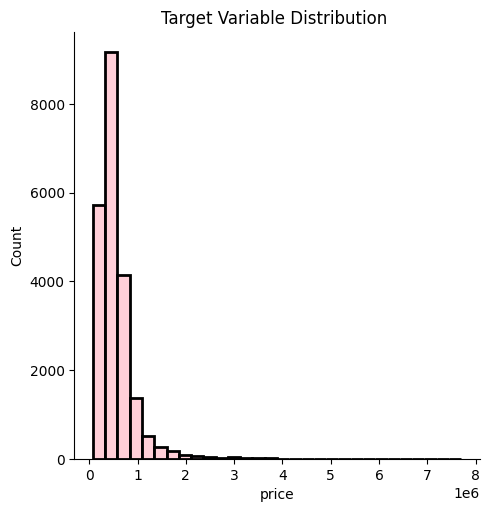

In [10]:
#Analyzing the distribution of the target variable
plt.figure(figsize=[4,4])
sns.displot(data[target], color='pink',edgecolor="black", linewidth=2, bins=30)
plt.title('Target Variable Distribution ')
plt.show()

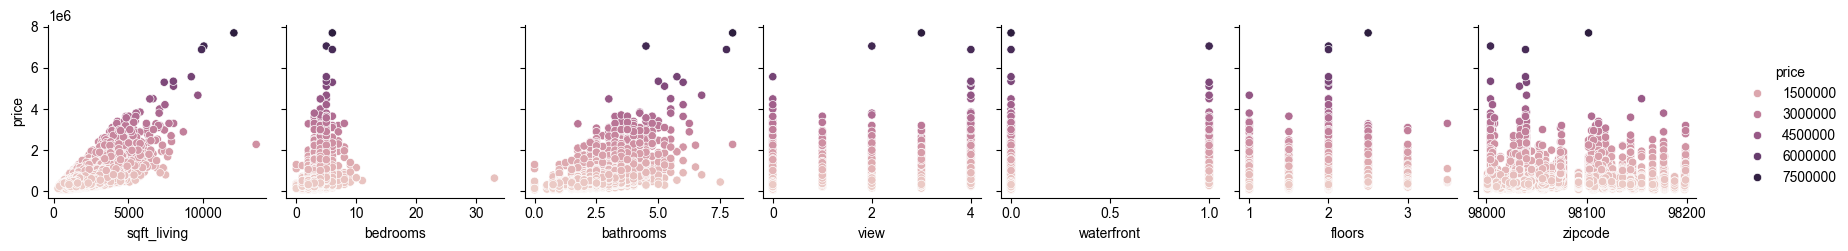

In [11]:
sns.pairplot(data, x_vars=['sqft_living', 'bedrooms', 'bathrooms','view','waterfront','floors', 'zipcode'], y_vars='price', kind='scatter',hue="price")
sns.set(rc={'figure.figsize':(50,50)})
plt.show()

In [12]:
#DATA PREPROCESSING

In [13]:
#Removal of Duplicate rows
data.drop_duplicates(inplace=True)

In [14]:
features

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15']

<Axes: >

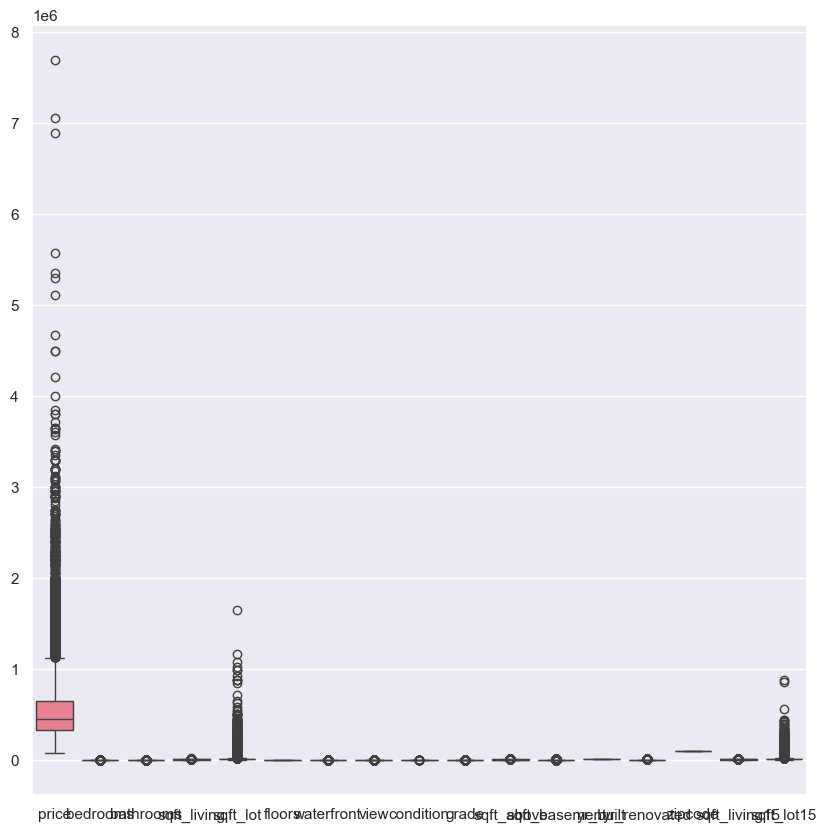

In [15]:
#Graph before removal of outliers
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(data,width=0.8)

In [16]:
#making array of numerical columns to check outliers
numerical_columns= [
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [17]:
#Removal of outlier:
df1 = data.copy()
for i in numerical_columns:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3-Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('Result:\nBefore removal of outliers, The dataset had {} samples.'.format(data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


Result:
Before removal of outliers, The dataset had 21613 samples.
After removal of outliers, The dataset now has 16712 samples.


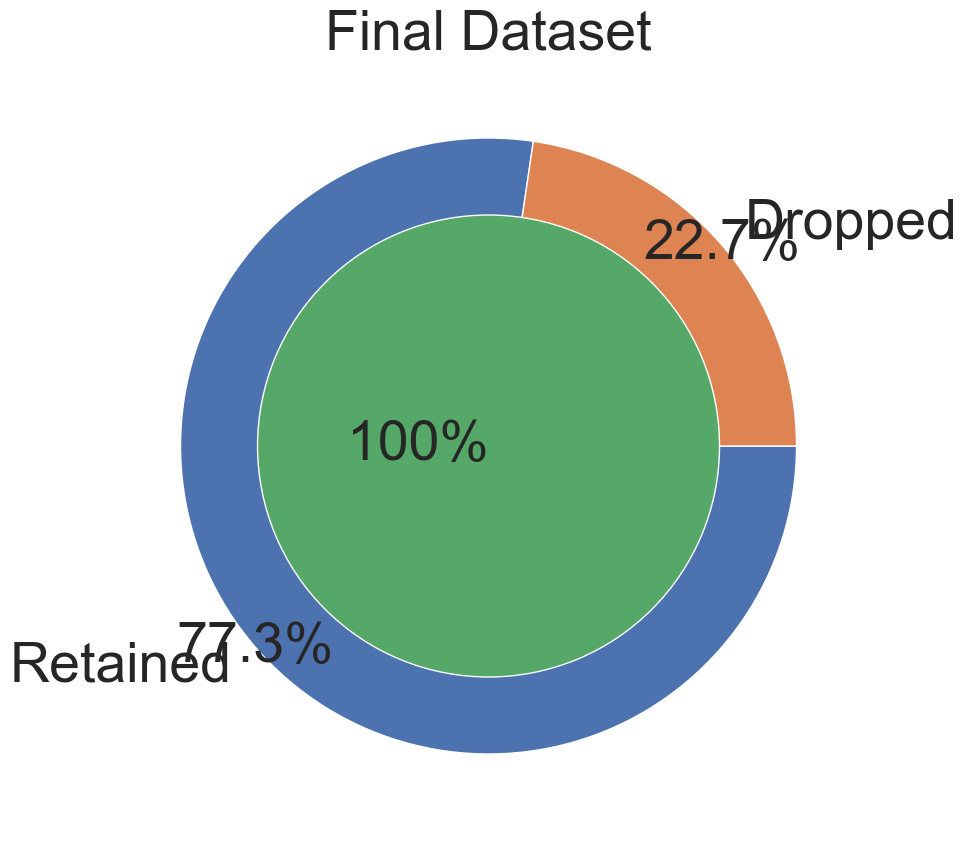

Result:
After the cleanup process, 4901 samples were dropped, which is 22.68% of the data.


In [18]:
# Showing final Dataset size after Preprocessing
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset', fontsize=40)
plt.pie([df.shape[0], data.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', textprops={'fontsize': 40},pctdistance=1, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=0, textprops={'fontsize': 40},radius=0.75)
plt.show()


print(f'Result:\nAfter the cleanup process, {data.shape[0]-df.shape[0]} samples were dropped, which is {round(100 - (df.shape[0]*100/(data.shape[0])),2)}% of the data.')

In [19]:
numerical_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [20]:
df1=df1.drop('date',axis=1)

In [21]:
#Splitting the data intro training & testing sets

m=[]
for i in df1.columns.values:
    m.append(i.replace(' ','_'))
    
df1.columns = m
X = df1.drop([target],axis=1)
Y = df1[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set=',X.shape,Y.shape,'\nTraining set=',Train_X.shape,Train_Y.shape,'\nTesting set=', Test_X.shape, Test_Y.shape)

Original set= (16712, 16) (16712,) 
Training set= (13369, 16) (13369,) 
Testing set= (3343, 16) (3343,)


In [22]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\nStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\nStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                          
Standardardization on Training set                                           


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04,1.336900e+04
mean,3.295209e-17,1.331371e-16,1.015137e-16,-1.116119e-16,-4.942814e-17,2.923169e-18,6.324675e-17,7.972280e-17,-3.162338e-16,9.885627e-17,1.009822e-17,1.240487e-15,-1.408436e-17,8.948831e-14,-1.302139e-17,-6.377824e-18
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.622846e+00,-1.877863e+00,-2.101864e+00,-1.967449e+00,-8.631989e-01,-4.414281e-02,-2.471564e-01,-3.702119e+00,-3.754178e+00,-1.872371e+00,-6.826441e-01,-2.309507e+00,-1.964902e-01,-1.513634e+00,-2.345631e+00,-2.162061e+00
25%,-3.331166e-01,-7.371519e-01,-7.575108e-01,-6.977554e-01,-8.631989e-01,-4.414281e-02,-2.471564e-01,-6.365490e-01,-4.632002e-01,-7.550108e-01,-6.826441e-01,-6.787143e-01,-1.964902e-01,-9.019227e-01,-7.483892e-01,-7.000319e-01
50%,-3.331166e-01,2.332219e-02,-1.013385e-01,8.389199e-03,-8.631989e-01,-4.414281e-02,-2.471564e-01,-6.365490e-01,-4.632002e-01,-2.471201e-01,-6.826441e-01,2.019693e-02,-1.964902e-01,-1.419171e-01,-1.765371e-01,8.577766e-02
75%,9.566127e-01,7.837963e-01,6.668633e-01,6.120139e-01,9.663859e-01,-4.414281e-02,-2.471564e-01,8.962362e-01,6.337924e-01,5.824349e-01,6.972629e-01,8.855156e-01,-1.964902e-01,6.736987e-01,6.319435e-01,6.478253e-01
max,2.246342e+00,2.304744e+00,3.563624e+00,3.524511e+00,3.710763e+00,2.265375e+01,6.676329e+00,2.429021e+00,3.924770e+00,2.918732e+00,2.960311e+00,1.517864e+00,5.138123e+00,2.156636e+00,2.820757e+00,2.807568e+00


                                           
Standardardization on Testing set                                           


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,-0.016375,0.002394,0.003134,0.008843,0.018756,0.010175,0.011724,0.003067,-0.012327,0.016205,-0.021012,-0.004055,-0.013181,0.005745,-0.005875,0.002976
std,0.992064,1.002391,1.011331,1.013163,1.000266,1.109193,1.035106,0.999440,1.010411,1.009838,0.990873,1.013493,0.967024,1.001150,1.002791,0.990068
min,-1.622846,-1.877863,-1.989835,-1.983603,-0.863199,-0.044143,-0.247156,-3.702119,-3.754178,-1.855441,-0.682644,-2.309507,-0.196490,-1.513634,-2.345631,-2.127880
25%,-0.333117,-0.737152,-0.789519,-0.678805,-0.863199,-0.044143,-0.247156,-0.636549,-0.463200,-0.755011,-0.682644,-0.678714,-0.196490,-0.901923,-0.748389,-0.687699
50%,-0.333117,0.023322,-0.133347,0.029515,-0.863199,-0.044143,-0.247156,-0.636549,-0.463200,-0.230190,-0.682644,0.020197,-0.196490,-0.141917,-0.176537,0.058997
75%,0.956613,0.783796,0.666863,0.599277,0.966386,-0.044143,-0.247156,0.896236,0.633792,0.633224,0.669665,0.885516,-0.196490,0.673699,0.612224,0.645359
max,2.246342,2.304744,3.339565,3.517055,3.710763,22.653748,6.676329,2.429021,5.021763,2.918732,2.960311,1.517864,5.138123,2.156636,2.820757,2.774092


                                         Correlation Matrix                                         


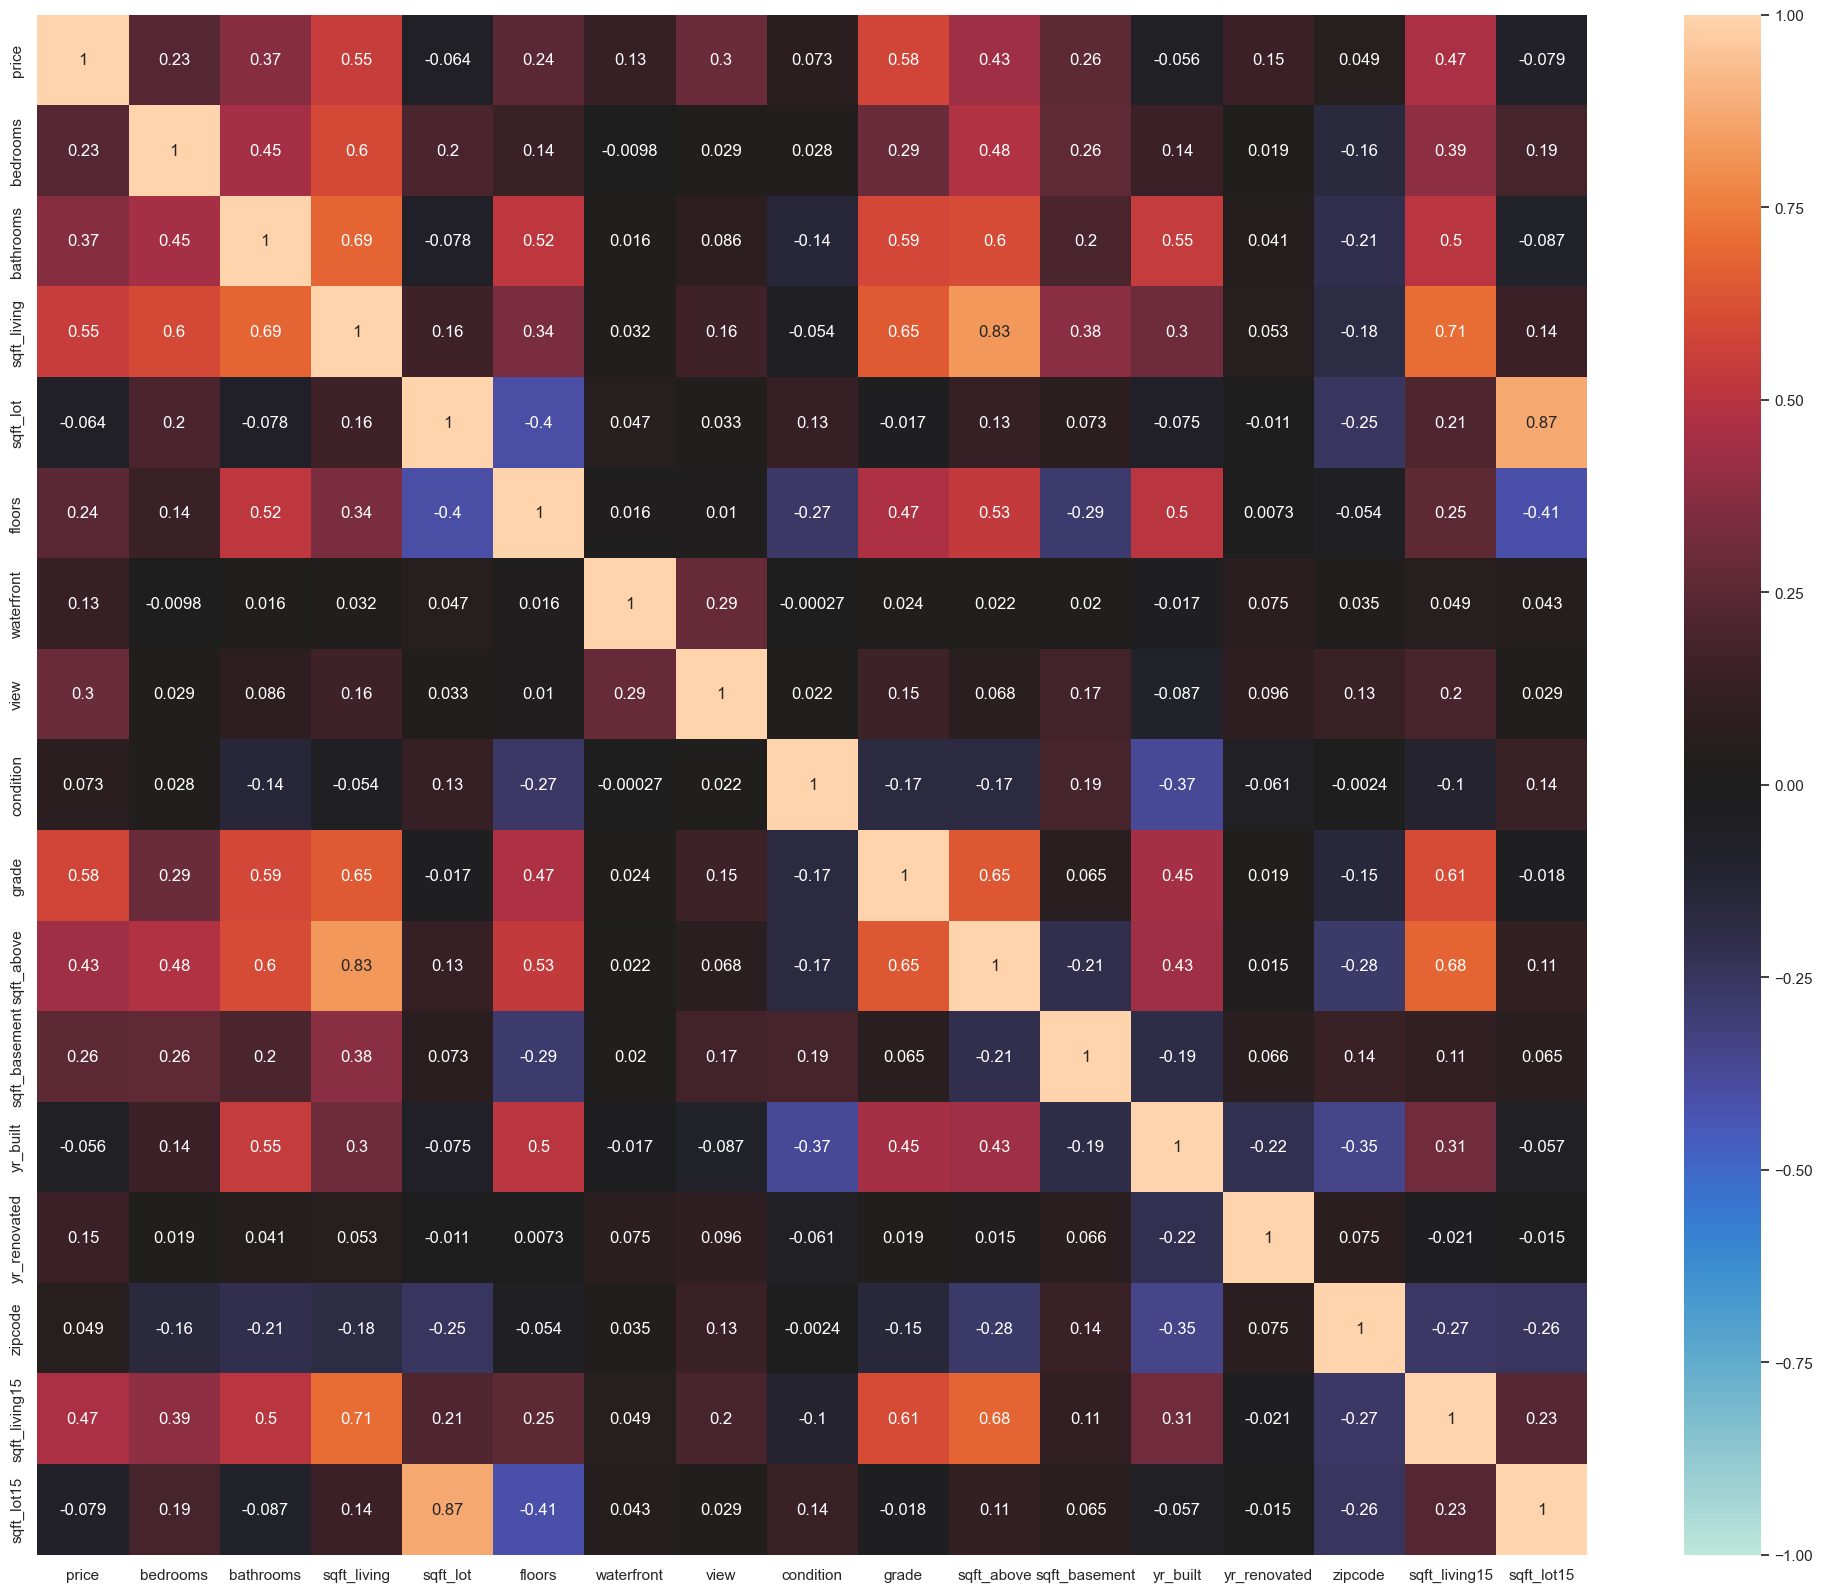

In [23]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

Coefficients: [-2.01497957e+04  1.81357590e+04 -1.79310618e+13 -3.81492082e+00
  2.15601353e+04  3.83654097e+05  3.51330196e+04  2.45314047e+04
  1.13318162e+05  1.79310618e+13  1.79310618e+13 -2.86460873e+03
  1.54757398e+01  6.62140811e+01  5.53470749e+01 -7.24906575e+00]
Intercept: -1529116.3821527413


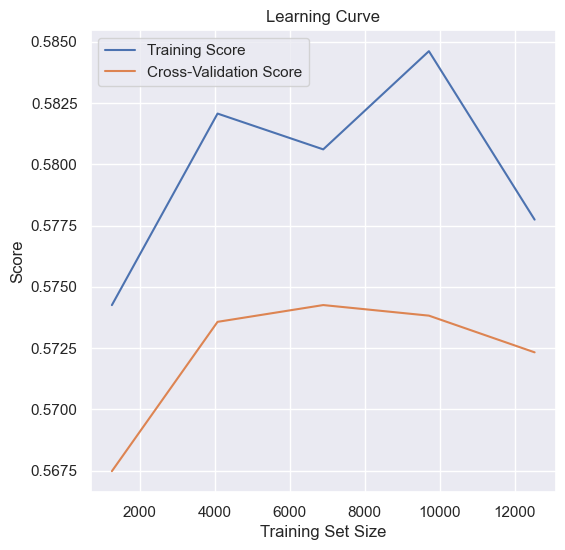

In [24]:
#Using Linear Regression model
model = LinearRegression()
model.fit(Train_X, Train_Y)

# coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=4)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
y_pred = model.predict(Test_X)

r2 = r2_score(Test_Y, y_pred)
mae = mean_absolute_error(Test_Y, y_pred)
rmse = np.sqrt(mean_squared_error(Test_Y, y_pred))

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R2 Score: 0.5788171783369198
Mean Absolute Error: 109459.24458024521
Root Mean Squared Error: 151715.81432434075


In [26]:
# plt.figure(figsize=[15,6])
# plt.scatter(y=Train_Y, x=Train_X_std, label='Actual')
# plt.scatter(y=y_pred, x=Train_X_std, label='Prediction')
# plt.legend()
# plt.show()


In [27]:
# lm = LinearRegression()
# rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-5)          
# rfe = rfe.fit(Train_X_std, Train_Y)

# LR = LinearRegression()
# LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)


# pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
# pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

# print(np.sqrt(mean_squared_error(Train_Y, pred1)))
# print(np.sqrt(mean_squared_error(Test_Y, pred2)))

# Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS','Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
# rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
# def Evaluate(n, pred1,pred2):
#     #Plotting predicted predicteds alongside the actual datapoints 
#     plt.figure(figsize=[15,6])
#     for e,i in enumerate(rc):
#         plt.subplot(2,3,e+1)
#         plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
#         plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
#         plt.legend()
#     plt.show()

In [28]:
# Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
# Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)

In [29]:
# MLR = LinearRegression().fit(Train_X_std,Train_Y)
# pred1 = MLR.predict(Train_X_std)
# pred2 = MLR.predict(Test_X_std)

# print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
# print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
# print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

# Evaluate(0, pred1, pred2)

In [30]:
from sklearn.linear_model import ElasticNet
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -3259.02901641  10335.21068052  31936.12611428 -10745.16406825
   9476.8638062   11742.47399538  21129.90310902  15367.92020248
  56851.31037288  21900.41418382  19369.40690947 -39835.65863216
  11379.99339006  10091.80960758  28452.38970038 -13760.29435597]
The Intercept of the Regresion Model was found to be  465287.6178472577


In [31]:
# Evaluate the model
r2 = r2_score(Test_Y, pred2)
mae = mean_absolute_error(Test_Y, pred2)
rmse = np.sqrt(mean_squared_error(Test_Y, pred2))

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R2 Score: 0.5259728509322802
Mean Absolute Error: 115990.27447608355
Root Mean Squared Error: 160952.28087779545


In [ ]:
# Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(ENR, X, Y, cv=4)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()